Liczba zdarzeń: 29
Czasy zdarzeń: [0, 1.8052031916670919, 1.938040949967673, 3.072030120339723, 3.1665550444623047, 3.3808958128192668, 4.008087606544899, 4.548923316767021, 5.261056207434895, 5.762775451197095, 5.977617607985886, 6.094545234873429, 6.214422966085162, 6.332222187841176, 7.009926361662987, 7.1243008579373805, 7.21350313234455, 8.201330007979731, 8.350451625380108, 8.705032771127788, 8.705952493987061, 8.76746330216007, 8.955235236813795, 9.013321497230947, 9.24427923456587, 9.368977842399866, 9.497453794289028, 9.654436296906892, 9.873298812039366, 9.979333977007588]


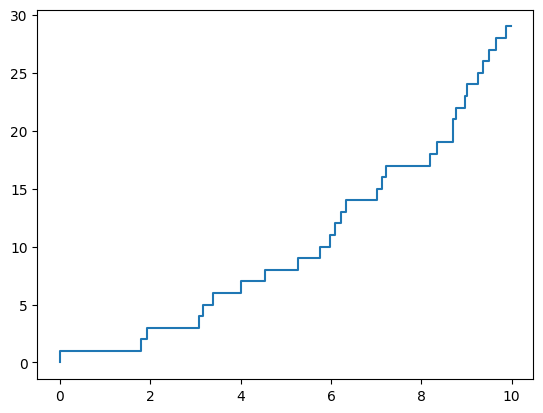

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.integrate import quad

def generuj_poissona(T, lamb, lamb_max):
    t = 0
    I = 0
    S = [0]

    while True:
        u1 = np.random.rand()
        t -= np.log(u1) / lamb_max
        if t > T:
            return I,S
        else:
            u2 = np.random.rand()
            if u2 <= lamb(t) / lamb_max:
                I += 1
                S.append(t)

t= np.linspace(0,10,1000)

def lamb(t):
    return 0.5*t+0.5

def intlamb(t):
    return t**2 +0.5*t

lamb_max = max(lamb(t))
I1, S1 = generuj_poissona(T=10, lamb=lamb, lamb_max=lamb_max)

print("Liczba zdarzeń:", I1)
print("Czasy zdarzeń:", S1)
plt.step(S1,np.arange(0, len(S1), 1))

plt.show()


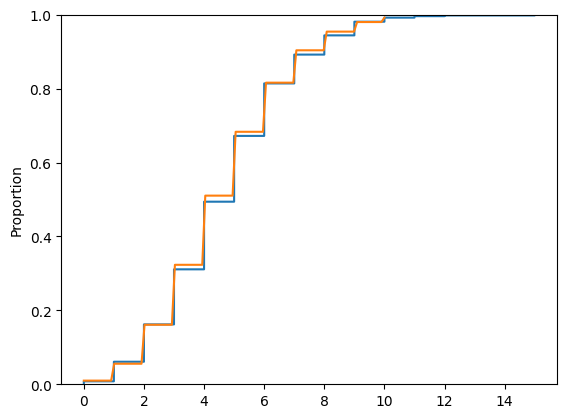

In [105]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

def generuj_poissona(T, lamb, lamb_max):
    t = 0
    I = 0
    S = []

    while True:
        u1 = np.random.rand()
        t -= np.log(u1) / lamb_max
        if t > T:
            return I,S
        else:
            u2 = np.random.rand()
            if u2 <= lamb(t) / lamb_max:
                I += 1
                S.append(t)

t= np.linspace(0,10,1000)
# funckja lambda(s)=1/(t+1)
def lamb(t):
    return 1/(t+1)
# całka z lambdy(s)= np.log(t+1)
def intlamb(t):
    return np.log(t+1)

lamb_max = max(lamb(t))

N=np.zeros(1000)
for i in range(1000):
    I1, S1 = generuj_poissona(T=100, lamb=lamb, lamb_max=lamb_max)
    N[i]=I1

t = np.linspace(0, 10, 100)


sns.ecdfplot(N,label="empiryczna")
plt.plot(t,scipy.stats.poisson.cdf(t,intlamb(100)),label="teoretyczna")

plt.show()
